# Lab | Matplotlib & Seaborn

#### Import all the libraries that are necessary.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Challenge 1

#### Data

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x,y) and (x,z) on the axes.
There are 2 ways of doing this. Do in both ways.
Hint: Check out the nrows, ncols, and index arguments of subplots.

Also, play around with the linewidth and style. Use the ones you're most happy with.

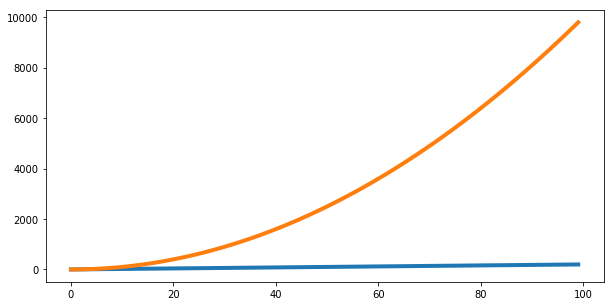

In [3]:
# OPTION 1
# Create a figure of a fixed size
plt.figure(figsize=(10,5))

# First plot
plt.plot(x,y, linewidth=4)

# Second plot
plt.plot(x,z, linewidth=4)

# Show the plot
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot below

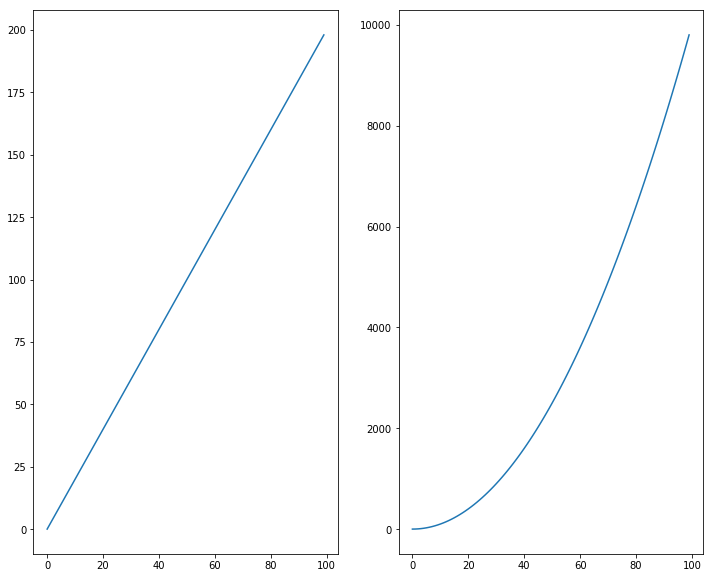

In [4]:
# OPTION 2

# Create a figure of a fixed size and axes
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize = (12,10))

# Plots
ax1.plot(x,y)
ax2.plot(x,z)
                       
#ax2.plot(z,x)

# Show the plot
plt.show()



#### Augmenting your previous code, resize your previous plot.
Hint: Add the figsize argument in plt.subplots()

<Figure size 432x288 with 0 Axes>

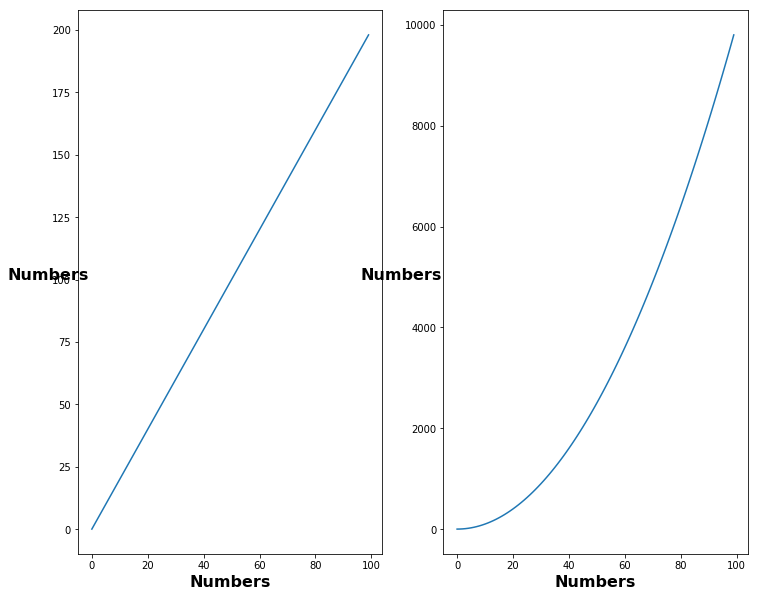

In [5]:
# ENHANCED VERSION to see more matplotlib features

# Variables
fs = 16 # fontsize
fw = 700 # fontweight
lw = 3 # lineweight
y_rot = 0 # ylabel rotation

# Create a figure of a fixed size and axes
plt.figure()
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize = (12,10))
ax1.plot(x,y)
ax2.plot(x,z)
plt.rc('lines', linewidth=lw)
# First plot adding a title and x and y labels

ax1.set_xlabel("Numbers", fontsize=fs, fontweight = fw)
ax1.set_ylabel("Numbers", fontsize=fs, fontweight = fw, rotation = y_rot)

# Second plot adding a title and x and y labels

ax2.set_xlabel("Numbers", fontsize=fs, fontweight = fw)
ax2.set_ylabel("Numbers", fontsize=fs, fontweight = fw, rotation = y_rot)
                               
# Show the plot
plt.show()
#paolo:ok - y-label does not work properly, you should adjust the value of y_rot

#### Plot both y=x^2 and y=exp(x) in the same plot using normal and logarithmic scale.
Hint: Use set_xscale and set_yscale

<Figure size 432x288 with 0 Axes>

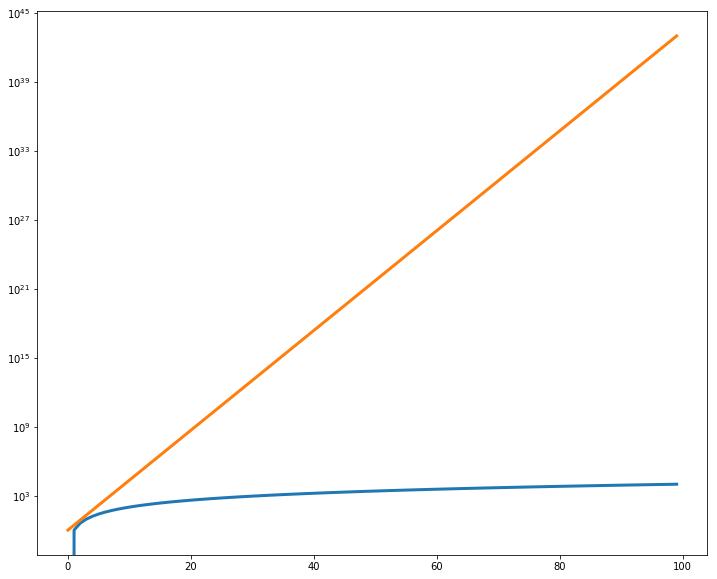

In [6]:
# Create a figure of a fixed size and axes
plt.figure()
fig, ax = plt.subplots(nrows=1,ncols=1, figsize = (12,10))

y1 = x**2
y2 = np.exp(x)

# Normal plot
ax.plot(x, y1)
ax.plot(x, y2)


# Logarithmic scale
plt.yscale("log")

# Show plot
plt.show()

<Figure size 432x288 with 0 Axes>

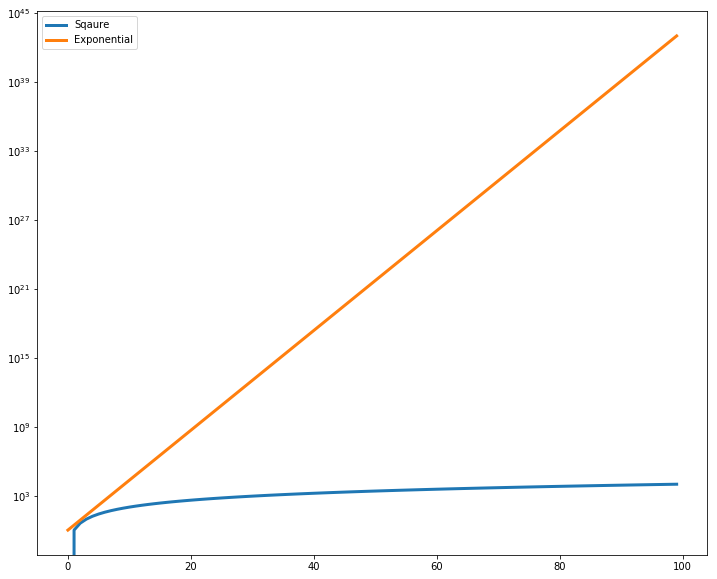

In [7]:
# ALTERNATIVE WITH LEGEND

# Create a figure of a fixed size and axes
plt.figure()
fig, ax = plt.subplots(nrows=1,ncols=1, figsize = (12,10))

y1 = x**2
y2 = np.exp(x)

# Normal plot
ax.plot(x, y1, label = 'Sqaure')
ax.plot(x, y2, label = 'Exponential')


# Logarithmic scale
plt.yscale("log")

# Show plot
plt.legend()
plt.show()

In [8]:
#paolo: yes- could you try to place the two previous plots as subplots in the same plot?

# Challenge 2

Import the Fitbit2.csv file and name your dataset fitbit. Download the data from [here](https://drive.google.com/file/d/17TW-w-izKuR7bLoa0Mnyp9YN9zEQNXq-/view?usp=sharing) and place it in the data folder. Access it through a relative path.

In [8]:
# Read the data

data = pd.read_csv('data/Fitbit2.csv')
data.sample(3)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
305,2016-03-07,322,16699,13.40,11,791.0,158,9,97,1664,...,8.326371,Monday,0.0,1,5.8,89.922481,0.0,0.00,March,3
235,2015-12-29,3135,1226,9.11,11,636.0,375,3,26,1718,...,5.660690,Tuesday,1.0,1,0.0,0.000000,0.0,0.00,December,12
134,2015-09-19,316,14226,10.57,11,669.0,291,35,41,1736,...,6.567891,Saturday,5.0,0,0.0,0.000000,6.9,86.25,September,9


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month.
Is Fitbitter more active on weekend or workdays?
All plots must be in the same jupyter notebook cell.

Hints:

- Use Months_encoded and Week_or Weekend columns.
- Use matplolib.pyplot object oriented API.
- Set your size figure to 12,4
- Explore plt.sca
- Explore plt.xticks
- Save your figures

<Figure size 432x288 with 0 Axes>

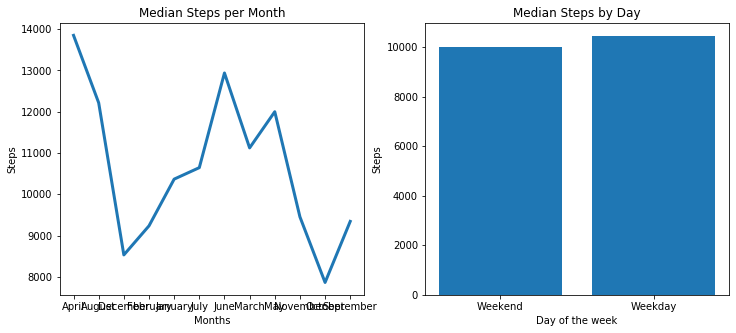

<Figure size 432x288 with 0 Axes>

In [9]:
# MEDIAN STEPS BY MONTH_ENCODED
# Find the median steps for each month
df = data.pivot_table(index=["Months"], aggfunc='median')
df_steps = df[['Steps']]


# Create a figure of a fixed size and axes
plt.figure()
fig, ax = plt.subplots(1,2, figsize = (12,5))

# Set the current axes instance to ax[0] - Now plt methods will affect ax[0]
plt.sca(ax[0])

# Plot the weekday steps in the current axes 
plt.plot(df_steps)
# Add labels, title, etc

plt.xlabel('Months')
plt.ylabel('Steps')
plt.title("Median Steps per Month")


# Save the figure
plt.savefig('Median Steps by Mnth') 

# MEDIAN STEPS BY WORK_OR_WEEKEND
# Set the current axes instance to ax[1] - Now plt methods will affect ax[1]
plt.sca(ax[1])

# Find the median steps for workdays and weekdays
df2 = data.pivot_table(index=["Work_or_Weekend"], aggfunc='median')
df2_steps = df2['Steps']
df2_steps


# Plot the workday and weekend steps in the current axes
x_ticks = ["Weekend", "Weekday"]
plt.bar([0,1], df2_steps)
plt.xticks([0,1], x_ticks)

# Add labels, title, etc
plt.xlabel('Day of the week')
plt.ylabel('Steps')
plt.title("Median Steps by Day")
plt.show()


# Save the figure
plt.savefig('Median Steps by Work_or_Wkd') 
#paolo- x label could you try to rotate the months? They are not readable like this- also it seems like the months
# are not graphed in  chronological order?

#### Write a loop to plot 3 scatter plots of the following features:

Minutes Lightly Active vs Steps
Minutes Very Active vs Steps
Minutes Sedentary vs Steps

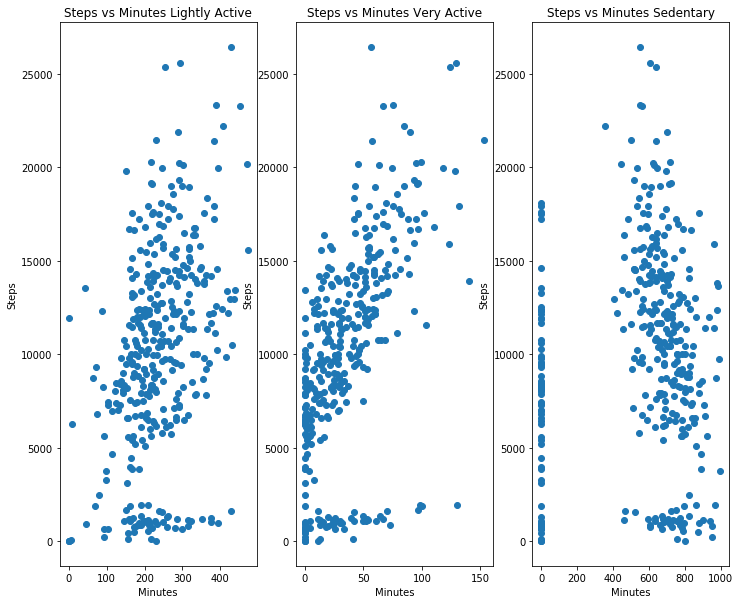

In [10]:
# ALTERNATIVE 1
# Create a df with the columns we are interested in ''
columns = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']
df3 = data[['Steps','Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']]
df3

# Create a figure of a fixed size and axes
fig, ax = plt.subplots(1,3, figsize = (12,10))


# Iterate to draw each scatter plot

for i, column in enumerate(columns):
    plt.sca(ax[i])
    plt.scatter(df3[column],df3['Steps'])
    plt.xlabel('Minutes')
    plt.ylabel('Steps')
    plt.title('Steps vs ' + column)


plt.show()



Text(0, 0.5, 'Steps')

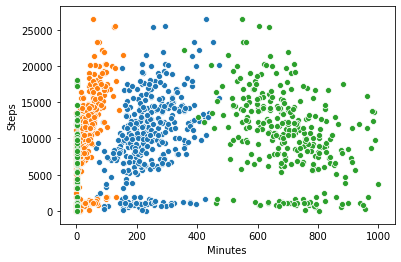

In [11]:
# ALTERNATIVE 2
# Create a df with the columns we are interested in 
df3

# Create a figure of a fixed size and axes


# Iterate to draw each scatter plot
for column in columns:
    sns.scatterplot(x = column, y = 'Steps', data = data, legend = 'full')
plt.xlabel("Minutes")
plt.ylabel("Steps")
#paolo: good idea with seaborn, you could add a legend 

In [15]:
#paolo check ok- have a look at comments above